In [96]:
pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/21/c2/f4ce7e004550a1ff74c83465fb9d11507f2d77dfab54203320e68fcd3c90/pyogrio-0.9.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/30/bd/b9bd3761f08754e8dbb34c5a647db2099b348ab5da338e90980caf280e37/pyproj-3.6.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/80/68/6b51b7587547f6bbd0965cf957505a0ebec93510e840572a983003b3a0a9/shapely-2.0.5-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import geopandas as gpd

In [70]:
!pip install geojson

  Obtaining dependency information for geojson from https://files.pythonhosted.org/packages/8e/1b/4f57660aa148d3e3043d048b7e1ab87dfeb85204d0fdb5b4e19c08202162/geojson-3.1.0-py3-none-any.whl.metadata


In [97]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [72]:
data = pd.read_csv("/Users/kirthanshaker/Desktop/SCMA 631 Data Files /NSSO68.csv", low_memory=False)

In [73]:
display(data)

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.180000
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.950000
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.840000
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.300000
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101657,101658,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,0.000000,544.013667,28.441750,J$K,2,0.000000,25.833333
101658,101659,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,8.000000,417.616600,25.490282,J$K,2,0.000000,49.000000
101659,101660,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,7.142857,378.300429,25.800107,J$K,2,0.000000,32.285714
101660,101661,8.00E+31,1,79998,68,10,1,1,1,12,...,0.0,0.0,0.0,14.000000,510.023600,30.220170,J$K,2,0.000000,39.200000


In [74]:
Kerala_data = data[data['state_1'] == 'KE']

In [75]:
missing_values = Kerala_data.isna().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
slno              0
grp               0
Round_Centre      0
FSU_number        0
Round             0
                 ..
foodtotal_q       0
state_1           0
Region            0
fruits_df_tt_v    0
fv_tot            0
Length: 384, dtype: int64


In [76]:
KE = Kerala_data[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]

In [77]:
def impute_with_mean(column):
    if column.hasnans:
        column.fillna(column.mean(), inplace=True)
    return column

In [78]:
KE['Meals_At_Home'] = impute_with_mean(KE['Meals_At_Home'])

/var/folders/zp/kxmfwbvj3vx9t44_bg3nv0v40000gn/T/ipykernel_45475/2826044316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.fillna(column.mean(), inplace=True)
/var/folders/zp/kxmfwbvj3vx9t44_bg3nv0v40000gn/T/ipykernel_45475/2585691173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KE['Meals_At_Home'] = impute_with_mean(KE['Meals_At_Home'])


In [79]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    df = df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]
    return df

outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    KE = remove_outliers(KE, col)

In [80]:
KE['total_consumption'] = KE[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

In [81]:
def summarize_consumption(group_col):
    summary = KE.groupby(group_col)['total_consumption'].sum().reset_index()
    summary.sort_values(by='total_consumption', ascending=False, inplace=True)
    return summary

In [82]:
district_summary = summarize_consumption('District')
region_summary = summarize_consumption('Region')

In [83]:
print("Top Consuming Districts:")
print(district_summary.head(4))
print("Region Consumption Summary:")
print(region_summary)

Top Consuming Districts:
    District  total_consumption
13        14        2328.076288
3          4        2123.501309
1          2        1896.350831
6          7        1885.952009
Region Consumption Summary:
   Region  total_consumption
1       2       11496.811972
0       1        9142.431659


In [84]:
district = {'1': 'Kasaragod',
    '2': 'Kannur',
    '3': 'Wayand',
    '4': 'Kozhikode',
    '5': 'Malappuram',
    '6': 'Palakkad',
    '7': 'Thrissur',
    '8': 'Eranakulam',
    '9': 'Idukki',
   '10': 'Kottayam',
   '11': 'Alappuzha',
   '12': 'Pathanamthitta',
   '13': 'Kollam',
   '14': 'Thiruvanathapuram',         
}

sector = {
    '2': 'URBAN',
    '1': 'RURAL'
}

In [85]:
KE.loc[:, 'District'] = KE['District'].astype(str)
KE.loc[:, 'Sector'] = KE['Sector'].astype(str)
KE.loc[:, 'District'] = KE['District'].map(district).fillna(KE['District'])
KE.loc[:, 'Sector'] = KE['Sector'].map(sector).fillna(KE['Sector'])

In [86]:
KE['District'] = KE['District'].astype(str)
KE['Sector'] = KE['Sector'].astype(str)

KE['District'] = KE['District'].map(district).fillna(KE['District'])
KE['Sector'] = KE['Sector'].map(sector).fillna(KE['Sector'])

In [87]:
print(KE.head())

      state_1    District  Region Sector  State_Region  Meals_At_Home  \
23436      KE  Malappuram       1  URBAN           321      83.483812   
23437      KE  Malappuram       1  URBAN           321      89.000000   
23438      KE  Malappuram       1  URBAN           321      90.000000   
23439      KE  Malappuram       1  URBAN           321      77.000000   
23440      KE  Malappuram       1  URBAN           321      88.000000   

       ricepds_v  Wheatpds_q  chicken_q  pulsep_q  wheatos_q  \
23436        4.0         0.0   0.666667  0.016667   0.666667   
23437        4.0         0.5   1.125000  0.050000   1.000000   
23438        0.0         0.0   1.000000  0.016667   0.333333   
23439        0.0         0.0   1.000000  0.050000   1.500000   
23440        0.0         0.0   0.333333  0.016667   0.500000   

       No_of_Meals_per_day  total_consumption  
23436                  3.0              5.350  
23437                  3.0              6.675  
23438                  3.0      

In [88]:
print(KE.columns)

Index(['state_1', 'District', 'Region', 'Sector', 'State_Region',
       'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q',
       'wheatos_q', 'No_of_Meals_per_day', 'total_consumption'],
      dtype='object')


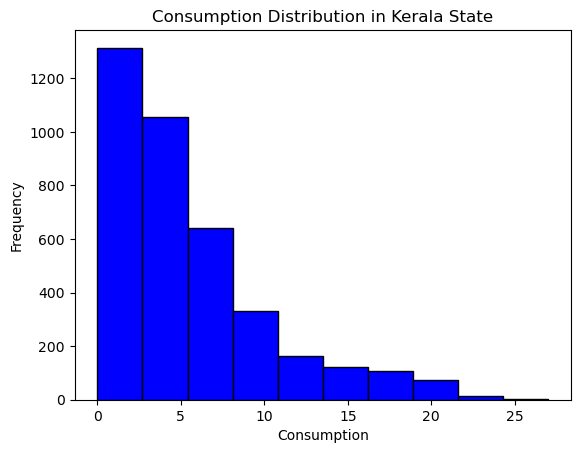

In [89]:
plt.hist(KE['total_consumption'], bins=10, color='blue', edgecolor='black')
plt.xlabel("Consumption")
plt.ylabel("Frequency")
plt.title("Consumption Distribution in Kerala State")
plt.show()

In [90]:
KE_consumption = KE.groupby('District')['total_consumption'].sum().reset_index()

In [91]:
print(KE_consumption.head())

     District  total_consumption
0   Alappuzha        1378.539983
1  Eranakulam        1755.480476
2      Idukki         734.516746
3      Kannur        1896.350831
4   Kasaragod        1207.148675


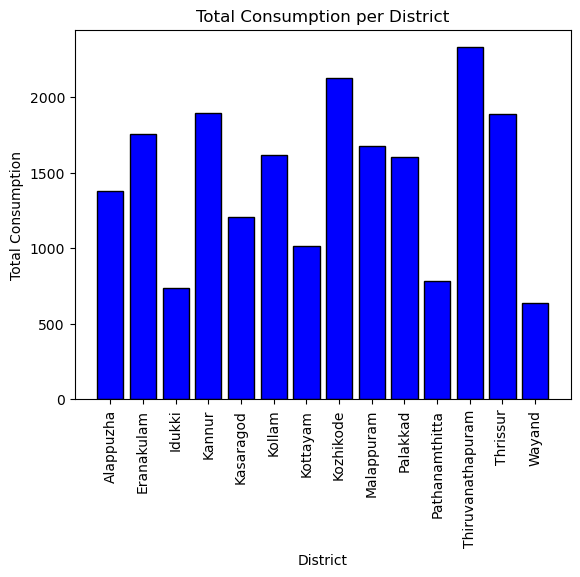

In [92]:
plt.bar(KE_consumption['District'], KE_consumption['total_consumption'], color='blue', edgecolor='black')
plt.xlabel("District")
plt.ylabel("Total Consumption")
plt.title("Total Consumption per District")
plt.xticks(rotation=90)  # Rotate district names for better visibility
plt.show()

In [98]:
data_map = gpd.read_file("/Users/kirthanshaker/Desktop/SCMA 631 Data Files /KERALA_DISTRICTS (1).geojson")

In [99]:
print(data_map.columns)
print(KE_consumption.columns)

Index(['dtname', 'stname', 'stcode11', 'dtcode11', 'year_stat', 'Shape_Length',
       'Shape_Area', 'OBJECTID', 'test', 'Dist_LGD', 'State_LGD', 'geometry'],
      dtype='object')
Index(['District', 'total_consumption'], dtype='object')


In [100]:
data_map['District'] = KE_consumption['District']

In [101]:
data_map_data = data_map.merge(KE_consumption, left_on='dtname', right_on='District')

In [102]:
print(data_map.columns)

Index(['dtname', 'stname', 'stcode11', 'dtcode11', 'year_stat', 'Shape_Length',
       'Shape_Area', 'OBJECTID', 'test', 'Dist_LGD', 'State_LGD', 'geometry',
       'District'],
      dtype='object')


In [103]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
data_map = gpd.read_file("/Users/kirthanshaker/Desktop/SCMA 631 Data Files /KERALA_DISTRICTS (1).geojson")

In [105]:
data_map = data_map.rename(columns={'dtname': 'District'})

In [106]:
display(data_map.rename)

<bound method DataFrame.rename of               District  stname stcode11 dtcode11 year_stat   Shape_Length  \
0            Kasaragod  KERALA       32      588    2011_c  382258.965224   
1              Wayanad  KERALA       32      590    2011_c  292261.797789   
2            Kozhikode  KERALA       32      591    2011_c  298776.567326   
3           Malappuram  KERALA       32      592    2011_c  409487.628759   
4             Palakkad  KERALA       32      593    2011_c  551293.272056   
5             Thrissur  KERALA       32      594    2011_c  397475.610728   
6               Idukki  KERALA       32      596    2011_c  570539.472994   
7            Ernakulam  KERALA       32      595    2011_c  412906.029329   
8            Alappuzha  KERALA       32      598    2011_c  299423.689877   
9             Kottayam  KERALA       32      597    2011_c  321896.971631   
10      Pathanamthitta  KERALA       32      599    2011_c  406371.586244   
11              Kollam  KERALA       32   

In [108]:
KE_consumption = pd.read_csv("/Users/kirthanshaker/Desktop/SCMA 631 Data Files /KERALA_DISTRICTS (1).geojson", low_memory=False)

In [109]:
KE_consumption = KE.groupby('District')['total_consumption'].sum().reset_index()

In [110]:
print(KE_consumption.head())

     District  total_consumption
0   Alappuzha        1378.539983
1  Eranakulam        1755.480476
2      Idukki         734.516746
3      Kannur        1896.350831
4   Kasaragod        1207.148675


In [113]:
data_map = gpd.read_file("/Users/kirthanshaker/Desktop/SCMA 631 Data Files /KERALA_DISTRICTS (1).geojson")
data_map = data_map.rename(columns={'dtname': 'total_consumption'})

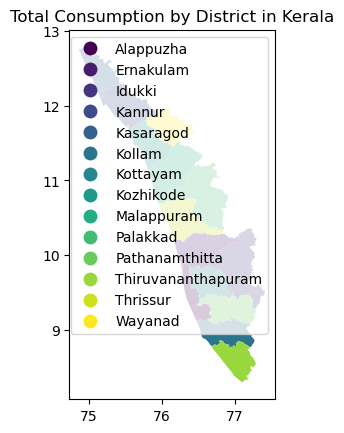

In [114]:
fig, ax = plt.subplots(1, 1)
data_map.plot(column='total_consumption', cmap='viridis', legend=True, ax=ax)
ax.set_title('Total Consumption by District in Kerala')
plt.show()